<a href="https://colab.research.google.com/github/rodrigo-fernandes092/Learning/blob/main/Estudo_Fundamentos_de_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados

In [34]:
df_raw = pd.read_parquet('/content/drive/MyDrive/Desenvolvimento/MBA/TCC/Dados/PIB/BaseDados_PIB_2009_2021.parquet.gzip')

In [35]:
df_raw.head()

,Ano,Cod_UF,Sigla_UF,Nome_UF,Cod_Cidade,Nome_Cidade,Valor_Agropecuaria,Valor_Industria,Valor_Servicos,Valor_Governo,Valor_total,Impostos,PIB,PIB_per_capita
0,2002,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,27013.223,9376.871,24651.113,42700.523,103741.729,7549.266,111290.995,4047.83
1,2002,11,RO,Rondônia,1100023,Ariquemes,28590.178,99922.936,161851.549,116562.182,406926.845,42665.972,449592.816,5667.37
2,2002,11,RO,Rondônia,1100031,Cabixi,10883.801,1961.907,5128.876,11925.001,29899.585,1867.935,31767.520,4246.99
3,2002,11,RO,Rondônia,1100049,Cacoal,32810.376,98292.764,175748.703,117968.303,424820.146,49622.951,474443.097,6353.27
4,2002,11,RO,Rondônia,1100056,Cerejeiras,11283.793,6651.475,25306.009,27731.366,70972.643,8200.971,79173.614,4442.47


## Filtrando a base

In [6]:
# cols = ['Ano', 'Nome_UF',
#         'Nome_Cidade','PIB']


# df_raw = df_raw[cols]

# **Fundamentos de Estatística**

##Tipos de variáveis

### **Qualitativas**
**Qualitativas**: são variáveis não métricas,


 * Podem atribuir duas ou mais categorias

 *A análise descritiva de variáveis qualitativas é feita por meio de tabelas de frequência e gráficos, pois tais variáveis não permitem o cálculo de medidas de posição e dispersão
**negrito**

###**Quantitativas**
São variáveis métricas, atribuem contagem ou mensuração
* Podem ser discretas ou contínuas

* A análise descritiva de variáveis quantitativas pode ser feita por diversas ferramentas estatísticas, incluindo as medidas de posição e dispersão


## **1 - Tabela de Frequências**





 * **Frequência absoluta**: contagem de ocorrências em cada
categoria

* **Frequência relativa**: percentual de cada categoria em relação ao total de observações

* **Frequência acumulada**: soma da frequência absoluta a cada nova categoria

* **Frequência relativa acumulada**: soma da frequência relativa a cada nova categoria





In [8]:
# Selecionando a base de dados que será feito a Tabela de Frequências

df_10 = df_raw[df_raw.Ano==2010] # Selecionando os valores do ano de 2010
df_filted = df_10[df_10.PIB>=df_10.PIB.mean()] # Selecionando os valores acima da média

In [9]:
# Criando Tabela de Frequências

tab_freq = pd.DataFrame(df_filted.\
                        pivot_table(
                            index='Nome_UF',\
                            values='PIB',\
                            aggfunc='count')).\
                            sort_values(by='PIB',ascending=True)

tab_freq.rename(columns={'PIB':'Frequencia_Absoluta'},inplace=True) # Renomeando

tab_freq['Frequencia_Relativa'] = ((
    tab_freq.Frequencia_Absoluta/tab_freq.Frequencia_Absoluta.sum())*100).round(2)

tab_freq['Frequencia_Acumulada'] = (
    tab_freq.Frequencia_Absoluta.cumsum())

tab_freq['Frequencia_Relativa_Acumulada'] = (
    tab_freq.Frequencia_Relativa.cumsum())


tab_freq.head(50)

,Frequencia_Absoluta,Frequencia_Relativa,Frequencia_Acumulada,Frequencia_Relativa_Acumulada
Nome_UF,,,,
Roraima,1,0.16,1,0.16
Distrito Federal,1,0.16,2,0.32
Acre,2,0.32,4,0.64
Amapá,2,0.32,6,0.96
Piauí,2,0.32,8,1.28
Tocantins,3,0.49,11,1.77
Amazonas,3,0.49,14,2.26
Alagoas,5,0.81,19,3.07
Paraíba,6,0.97,25,4.04


### Gráficos representando Tabela de Frequência

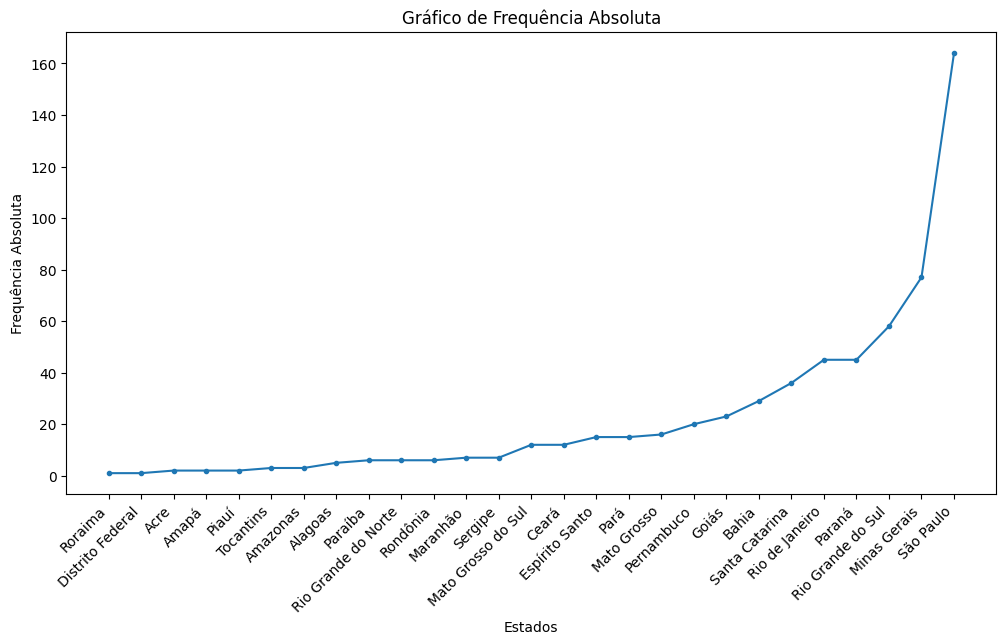

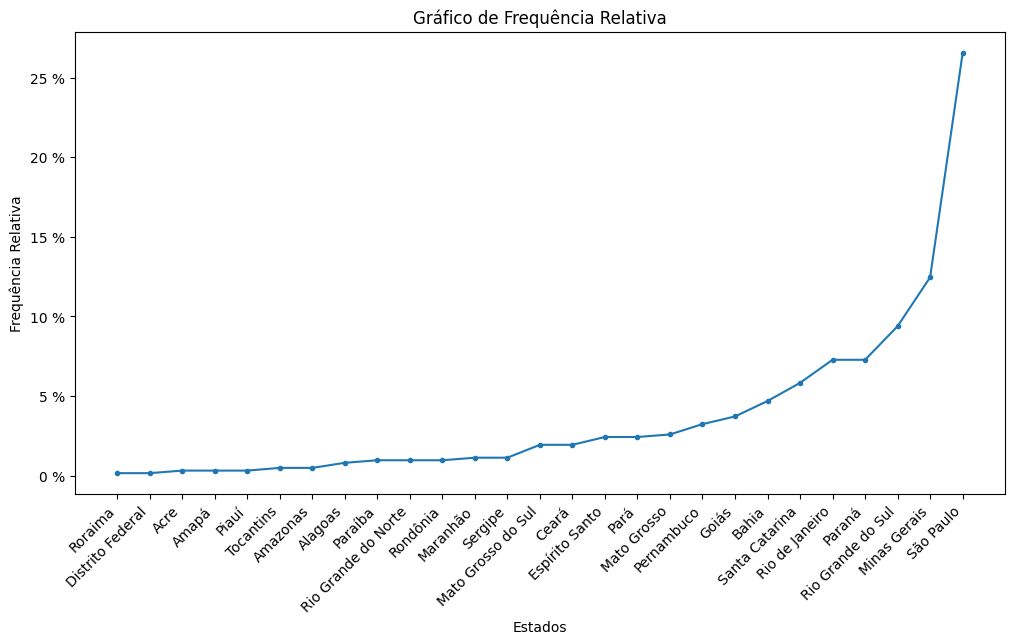

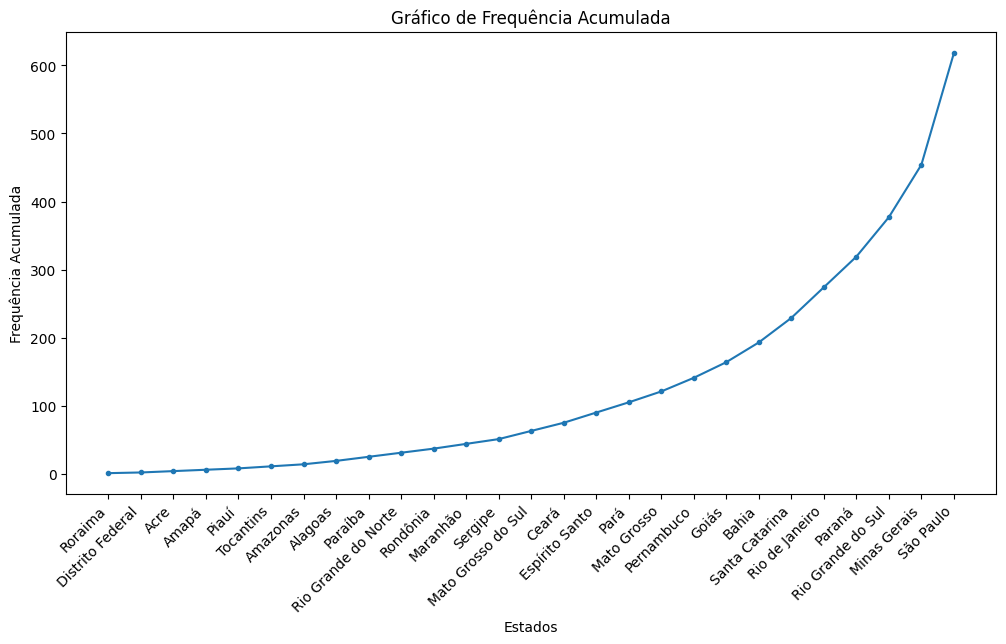

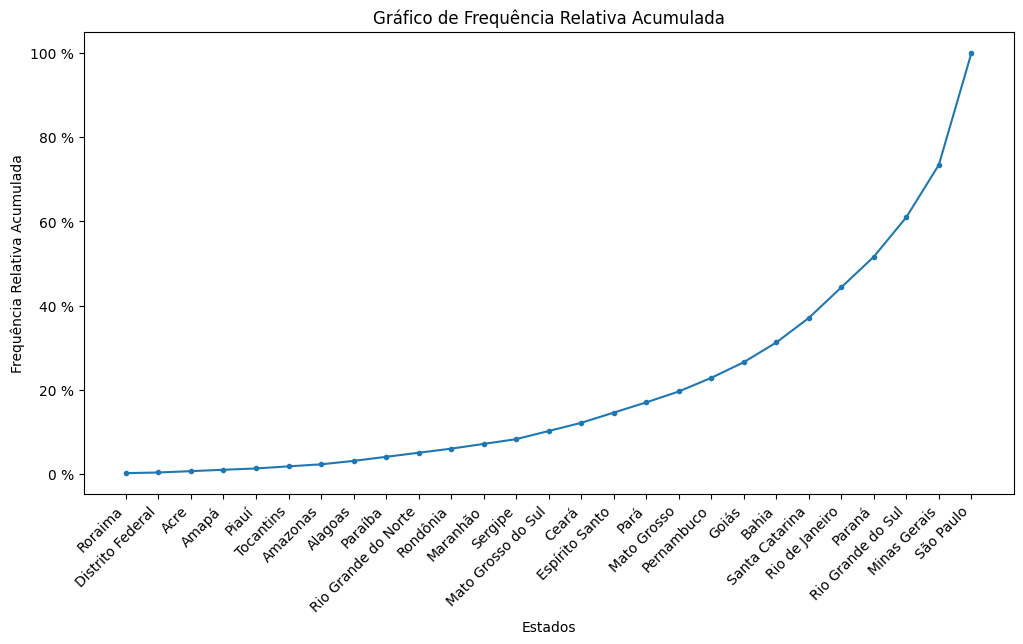

In [10]:


plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Absoluta'], marker='.')
plt.xlabel('Estados')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Absoluta')
plt.title('Gráfico de Frequência Absoluta')
plt.grid(False)
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Relativa'], marker='.')
plt.xlabel('Estados')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Relativa')
plt.title('Gráfico de Frequência Relativa')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} %'))
plt.grid(False)
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Acumulada'], marker='.')
plt.xlabel('Estados')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Acumulada')
plt.title('Gráfico de Frequência Acumulada')
plt.grid(False)
plt.show()




plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Relativa_Acumulada'], marker='.')
plt.xlabel('Estados')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Relativa Acumulada')
plt.title('Gráfico de Frequência Relativa Acumulada')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} %'))
plt.grid(False)
plt.show()


## **2 - Medidas de Dispersão**

### **Média**
É média aritmética simples para a variável, ou seja, é
a soma dos valores (Xi) contidos na variável dividido pela quantidade total de observações (n)

 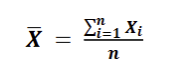




In [11]:
print('O valor médio do PIB em 2010 é de R$ '+ \
      str(df_10.PIB.mean().round(2)))

O valor médio do PIB em 2010 é de R$ 698265.41


### **Mediana**

* É o elemento central da distribuição da variável, considerando que a variável esteja com seus n valores organizados de forma crescente


* Metade dos valores da variável são maiores ou iguais ao valor da mediana e metade dos valores são menores ou iguais ao valor da mediana

 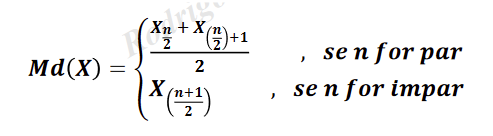

In [12]:
print('O valor da mediana do PIB em 2010 é de R$ '+ \
      str(df_10.PIB.median().round(2)))

O valor da mediana do PIB em 2010 é de R$ 90690.48


### **Moda**
* É o valor que aparece com maior frequência nas observações de uma variável

* A moda também pode ser calculada para dados qualitativos

* É possível que não exista a moda de uma variável (especialmente, se for uma variável contínua)


In [13]:
print(df_filted.Nome_UF.mode()[0] + ' foi o estado com maior frequência \
com o valor do PIB acima da média em 2010' )

São Paulo foi o estado com maior frequência com o valor do PIB acima da média em 2010


### **Quartis**

* São os elementos da distribuição da variável que dividem as observações em quatro partes iguais, considerando que a variável esteja com seus valores organizados de forma crescente

 * 1º Quartil: 25% das observações são menores do que o 1º quartil
 * 2º Quartil: trata-se da mediana
 * 3º Quartil: 25% das observações são maiores do que o 3º quartil

 * 1º Quartil = 25º Percentil
 * 2º Quartil = 50º Percentil
 * 3º Quartil = 75º Percenti


In [14]:
df_10.PIB.quantile([0.25,0.5,0.75]).round(2)



,PIB
0.25,41213.29
0.50,90690.48
0.75,238758.39




> O valor do 2° Quartil é o mesmo da mediana de R$ 90.690,48



## **3. Medidas de Dispersão**


### **Amplitude**
* Apresenta a diferença entre o valor máximo e o valor mínimo de uma variável


In [15]:
print('A amplitude do PIB das cidades brasileiras em 2010 é de '+\
      str(df_10.PIB.max() - df_10.PIB.min()))

A amplitude do PIB das cidades brasileiras em 2010 é de 450484770.22


### **Variância**

* Mostra a dispersão das observações de uma variável em torno de sua média

* Maior a variância, maior a dispersão dos valores em torno da média,
* Menor a variância, menor a dispersão dos valores em torno da média


In [16]:
print('A variância do PIB das cidades brasileiras em 2010 é de '+\
      str(df_10.PIB.var().round(2)))


A variância do PIB das cidades brasileiras em 2010 é de 54708294713110.04


### **Desvio Padrão**
* É uma medida derivada da variância, tornando mais simples a interpretação da dispersão em torno da média
  * A variância é definida em termos quadrados, o que dificulta a interpretação
* O desvio padrão é a raiz quadrada da variância

>* maior a Desvio padrão, maior a dispersão dos valores em torno da  média.
>
>* menor a Desvio padrão, menor a dispersão dos valores em torno da média


In [19]:

print('O Desvio Padrão do PIB das cidades brasileiras em 2010 é de '+\
      str(df_10.PIB.std().round(2)))

O Desvio Padrão do PIB das cidades brasileiras em 2010 é de 7396505.57


### **Erro padrão**

* É o desvio padrão da média da variável

 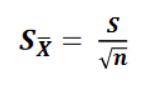

* Sendo que S é o desvio padrão da variável e n o tamanho da amostra

* Quanto maior o tamanho da amostra, menor o erro padrão na estimativa da média da variável → mais precisa é a média estimada


In [21]:

print('O erro padrão do PIB das cidades brasileiras em 2010 é de ' + \
      str((df_10.PIB.std() / np.sqrt(len(df_10.PIB))).round(2)))


O erro padrão do PIB das cidades brasileiras em 2010 é de 99150.29


### **Coeficiente de variação**
* medida de dispersão relativa, usado para comparar amostras diferentes com grandezas e medidas distintas.

* É uma medida de dispersão relativa, pois relaciona o desvio padrão e a média de uma variável

* Pode ser utilizada para realizar comparações entre amostras de diferentes grandezas, por exemplo

* Quanto menor o CV, mais homogêneos são os valores da variável e mais concentrados estão os valores em torno da média

 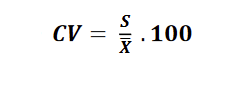


Como a base de dados do PIB só possui valores em reais e não há diferentes medidas. Então será usado outra base de dados, disponivel pelo colab california_housing_test

In [25]:
house = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [57]:

column = ['housing_median_age', 'total_rooms',
          'total_bedrooms', 'population',
          'households', 'median_income',
          'median_house_value']

for column in house[column]:
  print('O coeficiente de variação da coluna {} é: '.format(column) + \
      str(((house[column].std() / house[column].mean()) * 100).round(2)) + '%')


O coeficiente de variação da coluna housing_median_age é: 44.03%
O coeficiente de variação da coluna total_rooms é: 82.46%
O coeficiente de variação da coluna total_bedrooms é: 78.14%
O coeficiente de variação da coluna population é: 80.29%
O coeficiente de variação da coluna households é: 76.72%
O coeficiente de variação da coluna median_income é: 49.13%
O coeficiente de variação da coluna median_house_value é: 55.95%


In [51]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

O coeficiente de variação do PIB das cidades brasileiras em 2010 é de 1059.27%
